# 코인판 크롤러 프로그램

해당 프로그램은 2022년 11월에 제작됐으며, 향후 코인판 홈페이지의 개편이나 보안 강화가 이뤄질 경우, 해당 프로그램이 작동되지 않을 수 있습니다.

In [1]:
#module import 

import time
import json
import urllib
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from konlpy.tag import Okt

okt = Okt()

In [10]:
plt.rcParams["font.family"] = "Malgun Gothic"

In [2]:
#function

def word_counter(value, key_words):
    for i in value:
        if i not in key_words:
            key_words[i] = 1 #최초 언어
        elif i in key_words:
            key_words[i] += 1 #중복 언어
    return key_words


def tokenizer(text):
    for i in text:
        word = okt.nouns(i) #토큰화
    return text


def counter_to_DataFrame(key_words):
    word_df = pd.DataFrame(key_words.items()) #Data Frame 형성
    word_df.columns = ['단어', '빈도']
    word_df = word_df.sort_values(['빈도'],ascending = False).reset_index(drop = True) #내림차순 정렬
    return word_df


## 크롤링 프로그램
하단의 프로그램을 통해 코인판의 내용을 크롤링 할 수 있습니다

In [3]:
iter = 100    #몇 페이지까지 크롤링 할 것인지?

In [4]:
key_words = {}
word_lis = []

for i in range(iter):
    url = 'https://coinpan.com/index.php?mid=free&page=' + str(i)
    
    #딜레이 생성
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)

    #url 호출
    session = requests.session()
    res = session.get(url)
    res.raise_for_status()

    #html 추출
    soup = BeautifulSoup(res.text, 'html.parser')
    a = soup.find_all("td", attrs = {'class':'title'}) #제목이 들어있는 태그의 텍스트 추출
    text = str(a)
    num = len(a)
    words = re.compile('[가-힣]+').findall(text) #한글 제외 전부 제거
    words = words[23:-18] #불용어 제거

    token = tokenizer(words) #토큰화
    word_lis.append(token) #for topic_modeling
    key_words = word_counter(words, key_words) #Counter Dict 형성


In [5]:
df = counter_to_DataFrame(key_words) #Data Frame으로 변환
df #새글, 첨부, 이미지는 불용어 --> 이는 별도로 제거

,단어,빈도
0,새글,1919
1,첨부,738
2,이미지,378
3,리퍼,371
4,리퍼리움,208
...,...,...
171,따라가겠습니다,3
172,행님들,3
173,세력,3
174,물,1


In [6]:
df = df.drop([0,1,2]) #불용어 제거
df.reset_index(drop=True, inplace=True)

In [14]:
 top_df = df.head(20) #상위 20개 단어 추출

<AxesSubplot:xlabel='빈도', ylabel='단어'>

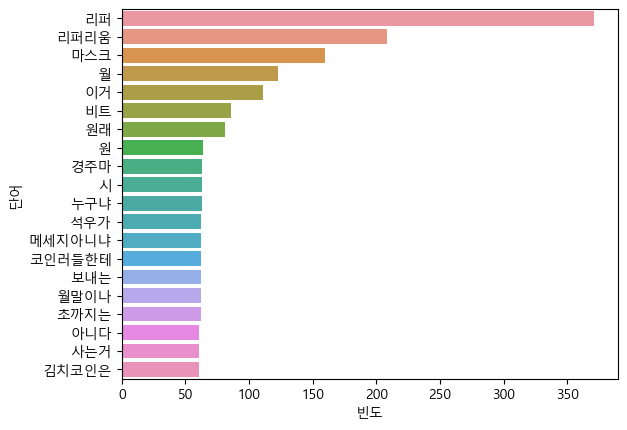

In [15]:
sns.barplot(data = top_df, x = '빈도', y = '단어')

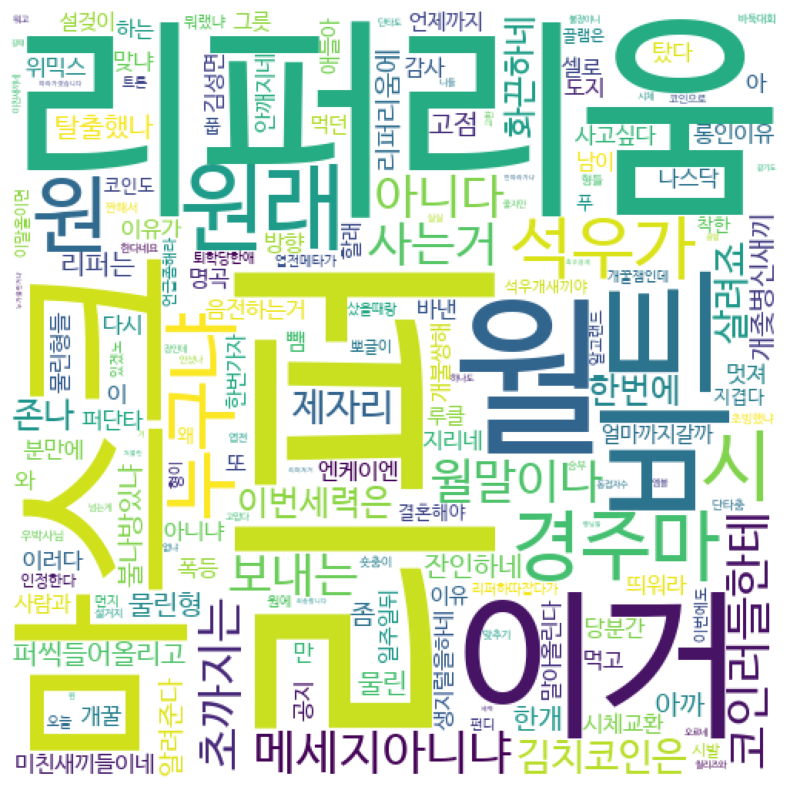

In [16]:
#WordCloud 형성
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf', #폰트 위치(사용자에 맞게 설정)
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(df.set_index('단어').to_dict()['빈도'])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
len(word_lis)

100

In [42]:
for lis in word_lis:
    while '새글' in lis:
        lis.remove('새글')
    while '이미지' in lis:
        lis.remove('이미지')
    while '첨부' in lis:
        lis.remove('첨부')
word_lis

[['와',
  '비트',
  '만',
  '안깨지네',
  '비트',
  '다시',
  '말아올린다',
  '애들아',
  '언제까지',
  '남이',
  '먹던',
  '그릇',
  '설겆이',
  '할래',
  '도지',
  '원',
  '원',
  '착한',
  '사람과',
  '결혼해야',
  '하는',
  '이유',
  '리퍼',
  '푸',
  '풉',
  '리퍼',
  '석우개새끼야',
  '마스크',
  '이번에도',
  '이말올이면',
  '인정한다',
  '형이',
  '뭐랬냐',
  '엽전메타가',
  '원래',
  '개꿀잼인데',
  '트론',
  '원에',
  '샀을때랑',
  '펀디',
  '먼지',
  '숏충이',
  '단타충',
  '형들',
  '짠해서',
  '리퍼',
  '미친새끼네',
  '단타도',
  '좋지만',
  '칠리즈와',
  '불장이니',
  '니들',
  '도지',
  '안샀나',
  '엠블',
  '시체',
  '교환',
  '고맙다',
  '뭐고',
  '동접자수',
  '실실',
  '오르네',
  '리퍼리움',
  '처물린',
  '흑우읍제',
  '비트',
  '왜',
  '나스닥',
  '안따라가냐',
  '와',
  '세력',
  '행님들',
  '따라가겠습니다',
  '죄송합니다'],
 ['와',
  '비트',
  '만',
  '안깨지네',
  '비트',
  '다시',
  '말아올린다',
  '애들아',
  '언제까지',
  '남이',
  '먹던',
  '그릇',
  '설겆이',
  '할래',
  '도지',
  '원',
  '원',
  '착한',
  '사람과',
  '결혼해야',
  '하는',
  '이유',
  '리퍼',
  '푸',
  '풉',
  '리퍼',
  '석우개새끼야',
  '마스크',
  '이번에도',
  '이말올이면',
  '인정한다',
  '형이',
  '뭐랬냐',
  '엽전메타가',
  '원래',
  '개꿀잼인데',
  '트론',
  '원에',
  '샀을때랑',
  '펀디',


In [44]:
from gensim import corpora
coin_dict = corpora.Dictionary(word_lis)
corpus = [coin_dict.doc2bow(text) for text in word_lis]

In [45]:
import gensim

perplexity = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=coin_dict)
    perplexity.append(ldamodel.log_perplexity(corpus))

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


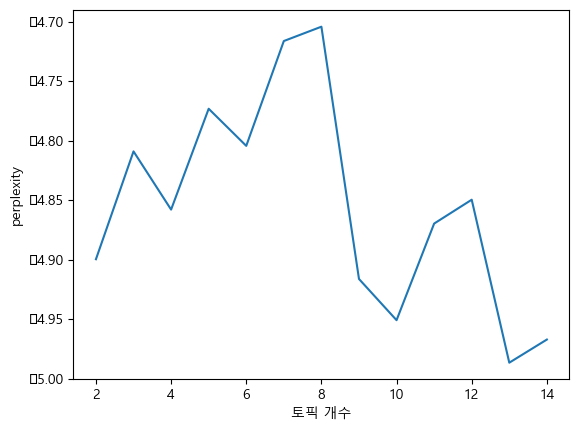

In [46]:
x = range(2,15)
plt.plot(x,perplexity)
plt.xlabel("토픽 개수")
plt.ylabel("perplexity")
plt.show()

In [47]:
from gensim.models import CoherenceModel

coherence = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=coin_dict)
    coherence_mo_lda = CoherenceModel(model = ldamodel, texts = word_lis, dictionary = coin_dict, topn=10) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

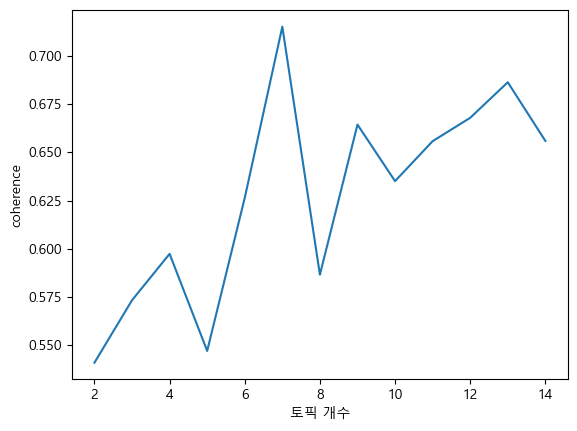

In [48]:
x = range(2,15)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

In [49]:
NUM_TOPICS = 7
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=coin_dict, passes=10)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.044*"리퍼" + 0.034*"비트" + 0.033*"마스크" + 0.032*"원" + 0.021*"원래"')
(1, '0.059*"리퍼" + 0.038*"리퍼리움" + 0.031*"월" + 0.026*"이거" + 0.022*"마스크"')
(2, '0.059*"리퍼" + 0.033*"리퍼리움" + 0.020*"아" + 0.020*"롱인이유" + 0.020*"당분간"')
(3, '0.013*"리퍼" + 0.009*"리퍼리움" + 0.008*"월" + 0.007*"마스크" + 0.007*"바낸"')
(4, '0.008*"리퍼" + 0.006*"리퍼리움" + 0.006*"잔인하네" + 0.006*"물린형" + 0.006*"물린"')
(5, '0.042*"리퍼" + 0.034*"비트" + 0.027*"도지" + 0.024*"원" + 0.020*"와"')
(6, '0.037*"물" + 0.036*"잘타놔라" + 0.011*"리퍼" + 0.008*"마스크" + 0.008*"리퍼리움"')


In [50]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, coin_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
